### Importing libraries

In [36]:
import os
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx 

from apyori import apriori
from mlxtend.frequent_patterns import association_rules
from mlxtend.frequent_patterns import apriori #fpmax, fpgrowth

warnings.filterwarnings('ignore')

%matplotlib inline

### Reading input file

In [37]:
# Reading csv data file in the form of dataframe and printing it
path_to_input_file = os.path.join(os.getcwd(), 'Employee_skills_traits.csv')
employee_skills_df = pd.read_csv(path_to_input_file)
employee_skills_df

,ID,Employment period,Time in current department,Gender,Team leader,Age,Member of professional organizations,.Net,SQL Server,HTML CSS Java Script,PHP mySQL,Fast working,Awards,Communicative
0,6723,5,4,0,1,48,1,1,1,0,1,1,0,1
1,8923,5,3,1,1,26,1,1,0,0,1,1,0,0
2,2322,11,8,0,0,34,0,0,1,1,0,1,0,1
3,235,7,5,1,1,27,1,0,1,0,1,1,1,0
4,9523,18,8,0,0,38,0,0,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,6098,12,3,1,1,32,1,0,0,0,1,1,0,1
994,12133,16,8,1,0,36,1,1,1,0,0,0,1,1
995,854,11,4,0,1,34,1,0,1,0,1,1,0,0
996,13444,8,8,1,0,36,0,0,1,0,0,0,1,1


### Removing whitespaces from column names

We observed that there is whitespace in the column names of the dataframe, hence we remove them.

In [38]:
employee_skills_df.columns = employee_skills_df.columns.str.strip()
employee_skills_df.head()

,ID,Employment period,Time in current department,Gender,Team leader,Age,Member of professional organizations,.Net,SQL Server,HTML CSS Java Script,PHP mySQL,Fast working,Awards,Communicative
0,6723,5,4,0,1,48,1,1,1,0,1,1,0,1
1,8923,5,3,1,1,26,1,1,0,0,1,1,0,0
2,2322,11,8,0,0,34,0,0,1,1,0,1,0,1
3,235,7,5,1,1,27,1,0,1,0,1,1,1,0
4,9523,18,8,0,0,38,0,0,0,1,1,1,1,1


# Data Preprocessing

### Dropping duplicate records, if any
##### Note: The dataset doesn't really have any duplicate records, it is just the ID which seems to be duplicated, all the other attributes are different even for the same id and I dont think we can just drop those records


In [4]:
# print("Dimension of the data before deleting duplicates - ",employee_skills_df.shape)

# duplicate_rows= employee_skills_df[employee_skills_df.duplicated(['ID'],keep=False)]
# print("Number of duplicate records - ", sum(employee_skills_df.duplicated(['ID'])))

# if not duplicate_rows.empty:
#     employee_skills_df.drop_duplicates(['ID'],keep='first',inplace=True)

# print("Dimension of the data after deleting duplicates - ",employee_skills_df.shape)

# The dataset doesn't really have any duplicate records, it is just the ID which seems to be duplicated, 
# all the other attributes are different even for the same id and I dont think we can just drop those records

employee_skills_df.shape
duplicate_records = employee_skills_df[employee_skills_df.duplicated(keep=False)]
if not duplicate_records.empty:
    employee_skills_df.drop_duplicates(keep=False, inplace=True)
employee_skills_df.shape

(998, 14)

### Understanding correlation between data points

In [39]:
correlation = employee_skills_df.corr()
correlation

,ID,Employment period,Time in current department,Gender,Team leader,Age,Member of professional organizations,.Net,SQL Server,HTML CSS Java Script,PHP mySQL,Fast working,Awards,Communicative
ID,1.000000,0.021231,0.045212,-0.002563,0.019724,0.058252,-0.003988,0.033203,0.027852,0.009756,0.001788,0.007470,-0.009040,0.006633
Employment period,0.021231,1.000000,0.495719,0.033907,-0.048001,0.164389,-0.042311,-0.086372,-0.041851,0.050546,0.029320,0.031121,0.016359,-0.080846
Time in current department,0.045212,0.495719,1.000000,0.009666,-0.005733,0.076987,-0.065801,-0.051051,-0.048757,0.005154,0.025756,0.049245,-0.006786,-0.017179
Gender,-0.002563,0.033907,0.009666,1.000000,0.024301,0.010982,-0.008624,-0.027479,-0.045607,0.000482,0.062893,-0.053953,0.024180,-0.024820
Team leader,0.019724,-0.048001,-0.005733,0.024301,1.000000,-0.010266,-0.037924,0.024444,0.002392,-0.034202,0.002360,0.015985,-0.002036,0.107978
Age,0.058252,0.164389,0.076987,0.010982,-0.010266,1.000000,-0.052271,-0.002076,0.001022,-0.008468,0.012754,0.030642,0.022791,-0.007664
Member of professional organizations,-0.003988,-0.042311,-0.065801,-0.008624,-0.037924,-0.052271,1.000000,-0.004938,0.009069,-0.017721,-0.071107,-0.019924,0.010102,0.008869
.Net,0.033203,-0.086372,-0.051051,-0.027479,0.024444,-0.002076,-0.004938,1.000000,0.037948,0.008765,0.001980,-0.001729,-0.019877,-0.052270
SQL Server,0.027852,-0.041851,-0.048757,-0.045607,0.002392,0.001022,0.009069,0.037948,1.000000,0.026858,-0.052332,0.000289,0.034301,-0.070264
HTML CSS Java Script,0.009756,0.050546,0.005154,0.000482,-0.034202,-0.008468,-0.017721,0.008765,0.026858,1.000000,0.002714,-0.000096,0.005949,0.015373


### Removing columns which are not relevant to finding associations
#### Studying the correlation table we see that ID and Gender are having negative or negligent correlations with most of the other attributes and can be considered irrelevant to finding out associations, it will be wise to drop them before applying the algorithm

In [40]:
employee_skills_df.drop(columns=['ID', 'Gender'], inplace=True)
employee_skills_df

,Employment period,Time in current department,Team leader,Age,Member of professional organizations,.Net,SQL Server,HTML CSS Java Script,PHP mySQL,Fast working,Awards,Communicative
0,5,4,1,48,1,1,1,0,1,1,0,1
1,5,3,1,26,1,1,0,0,1,1,0,0
2,11,8,0,34,0,0,1,1,0,1,0,1
3,7,5,1,27,1,0,1,0,1,1,1,0
4,18,8,0,38,0,0,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
993,12,3,1,32,1,0,0,0,1,1,0,1
994,16,8,0,36,1,1,1,0,0,0,1,1
995,11,4,1,34,1,0,1,0,1,1,0,0
996,8,8,0,36,0,0,1,0,0,0,1,1


# Data Conversion/Normalization


#### We will first bin numeric attributes such as Employment Period, Age and Time using equal width binning and then convert them into categorical variables

### Binning non categorical attributes

In [41]:
# Normalizing employment period values through equal width binning

employee_skills_df['Employment period'].describe()

employment_period_bin_label = ['0-5', '6-10', '11-15', '16-20']
cut_bins_employment_period = [0, 5, 10, 15, 20]
employee_skills_df['Employment period'] = pd.cut(employee_skills_df['Employment period'], bins=cut_bins_employment_period, labels=employment_period_bin_label)
employee_skills_df.head()


,Employment period,Time in current department,Team leader,Age,Member of professional organizations,.Net,SQL Server,HTML CSS Java Script,PHP mySQL,Fast working,Awards,Communicative
0,0-5,4,1,48,1,1,1,0,1,1,0,1
1,0-5,3,1,26,1,1,0,0,1,1,0,0
2,11-15,8,0,34,0,0,1,1,0,1,0,1
3,6-10,5,1,27,1,0,1,0,1,1,1,0
4,16-20,8,0,38,0,0,0,1,1,1,1,1


In [42]:
# Normalizing age values through equal width binning

employee_skills_df['Age'].describe()

age_bin_label = ['20-30', '31-40', '41-50', '51-60']
cut_bins_age = [20, 30, 40, 50, 60]
employee_skills_df['Age'] = pd.cut(employee_skills_df['Age'], bins=cut_bins_age, labels=age_bin_label)
employee_skills_df.head()


,Employment period,Time in current department,Team leader,Age,Member of professional organizations,.Net,SQL Server,HTML CSS Java Script,PHP mySQL,Fast working,Awards,Communicative
0,0-5,4,1,41-50,1,1,1,0,1,1,0,1
1,0-5,3,1,20-30,1,1,0,0,1,1,0,0
2,11-15,8,0,31-40,0,0,1,1,0,1,0,1
3,6-10,5,1,20-30,1,0,1,0,1,1,1,0
4,16-20,8,0,31-40,0,0,0,1,1,1,1,1


In [43]:
# Normalizing employee's time in current department values through equal width binning

employee_skills_df['Time in current department'].describe()

current_department_bin_label = ['0-3', '4-6', '7-9', '10-12']
cut_bins_curr_dept = [0, 3, 6, 9, 12]
employee_skills_df['Time in current department'] = pd.cut(employee_skills_df['Time in current department'], bins=cut_bins_curr_dept, labels=current_department_bin_label)
employee_skills_df.head()


,Employment period,Time in current department,Team leader,Age,Member of professional organizations,.Net,SQL Server,HTML CSS Java Script,PHP mySQL,Fast working,Awards,Communicative
0,0-5,4-6,1,41-50,1,1,1,0,1,1,0,1
1,0-5,0-3,1,20-30,1,1,0,0,1,1,0,0
2,11-15,7-9,0,31-40,0,0,1,1,0,1,0,1
3,6-10,4-6,1,20-30,1,0,1,0,1,1,1,0
4,16-20,7-9,0,31-40,0,0,0,1,1,1,1,1


### Converting non categorical variables into categorical attributes

In [44]:
employee_skills_df = pd.get_dummies(employee_skills_df, columns=['Employment period', 'Age', 'Time in current department'])
employee_skills_df.head()

,Team leader,Member of professional organizations,.Net,SQL Server,HTML CSS Java Script,PHP mySQL,Fast working,Awards,Communicative,Employment period_0-5,...,Employment period_11-15,Employment period_16-20,Age_20-30,Age_31-40,Age_41-50,Age_51-60,Time in current department_0-3,Time in current department_4-6,Time in current department_7-9,Time in current department_10-12
0,1,1,1,1,0,1,1,0,1,1,...,0,0,0,0,1,0,0,1,0,0
1,1,1,1,0,0,1,1,0,0,1,...,0,0,1,0,0,0,1,0,0,0
2,0,0,0,1,1,0,1,0,1,0,...,1,0,0,1,0,0,0,0,1,0
3,1,1,0,1,0,1,1,1,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,0,0,1,1,1,1,1,0,...,0,1,0,1,0,0,0,0,1,0


# Data Mining

#### To check association among employee experience, skills and traits, we will be doing association rule mining on our data. 
The rules which we will be formulating has two elements :

- Antecedent : This is an item/group of items that are typically found in the Itemsets or Datasets.
- Consequent : This comes along as an item with an Antecedent/group of Antecedents.

#### Mectrics of association :

> 1) **Support**: It gives the fraction of transactions which contains item A and B. Basically Support tells us about the frequently bought items or the combination of items bought frequently.
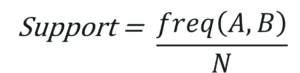

> Using support, we can filter out items that have low frequency

> 2) **Confidence** : It tells us how often the items A and B occur together, given the number times A occurs.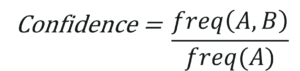

> Even after filtering with support and confidence, we can still have many items left. Creating association rules for them is a practically impossible task for anyone. This is where the concept of lift comes into play.

> 3) **Lift** : Lift indicates the strength of a rule over the random occurrence of A and B. It basically tells us the strength of any rule.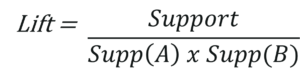



### Apriori Algorithm

Apiori algorithm is the most widely used algorithm to mine association rules. It is based on the concept that a subset of a frequent itemset must also be a frequent itemset. Frequent Itemset is an itemset whose support value is greater than a given threshold value.


The first step in implementing Apiori algorithm is to find frequent itemsets from the data. We start with support value of 0.4 and stop when we have enough frequent itemsets to extract rules.

In [11]:
support_list = [0.4, 0.3, 0.2, 0.1, 0.05]

for support in support_list:
    frequent_itemsets = apriori(employee_skills_df, min_support=support, use_colnames=True)
    frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
    print(f"For minimum support = {support}, number of frequent itemsets = {frequent_itemsets.shape[0]}")
    print(frequent_itemsets)
    print("-----------------------------------------------------------------------------")
    print()


For minimum support = 0.4, number of frequent itemsets = 10
    support                                itemsets  length
0  0.504008                           (Team leader)       1
1  0.489980  (Member of professional organizations)       1
2  0.476954                                  (.Net)       1
3  0.475952                            (SQL Server)       1
4  0.508016                  (HTML CSS Java Script)       1
5  0.477956                             (PHP mySQL)       1
6  0.503006                          (Fast working)       1
7  0.502004                                (Awards)       1
8  0.521042                         (Communicative)       1
9  0.423848                             (Age_31-40)       1
-----------------------------------------------------------------------------

For minimum support = 0.3, number of frequent itemsets = 12
     support                                itemsets  length
0   0.504008                           (Team leader)       1
1   0.489980  (Memb

#### Based on the observations above, we choose the frequent itemsets by keeping the min support as 0.05 as we get enough itemsets to extract meaningful rules.

In [45]:
# Finding frequent itemsets with minimum support of 0.05
frequent_itemsets = apriori(employee_skills_df, min_support=0.05, use_colnames=True)

# Generating association rules using 
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.5)
print(f"Rules generated with minimum support of 0.05 are {rules.shape[0]}")
rules.head()

Rules generated with minimum support of 0.05 are 5442


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Member of professional organizations),(Team leader),0.489980,0.504008,0.237475,0.484663,0.961617,-0.009479,0.962461
1,(Team leader),(Member of professional organizations),0.504008,0.489980,0.237475,0.471173,0.961617,-0.009479,0.964436
2,(.Net),(Team leader),0.476954,0.504008,0.246493,0.516807,1.025394,0.006104,1.026488
3,(Team leader),(.Net),0.504008,0.476954,0.246493,0.489066,1.025394,0.006104,1.023705
4,(SQL Server),(Team leader),0.475952,0.504008,0.240481,0.505263,1.002490,0.000597,1.002537


#### Filtering rules with lift  and confidence
We can see that rules generated with minimum support value of 0.05 are 5442. Analysing these number of rules is an impossible task hence we need to refine our rule set using other metrics viz. confidence and lift. First we will take confidence of 65% and lift greater than equal to 1.

In [46]:
# Refining rules with confidence > 65% and lift >=1
conf_vl = 0.65
lift_vl = 1
rules = rules[(rules['confidence']>=conf_vl) & (rules['lift']>=lift_vl)]
print(f"Rules left by refining with min confidence = {conf_vl} and lift = {lift_vl} are {rules.shape[0]}")
rules

Rules left by refining with min confidence = 0.65 and lift = 1 are 26


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
294,(Employment period_0-5),(Time in current department_0-3),0.260521,0.322645,0.176353,0.676923,2.098041,0.092297,2.096574
878,"(Team leader, Employment period_0-5)",(Communicative),0.145291,0.521042,0.097194,0.668966,1.283899,0.021492,1.446852
938,"(Team leader, Employment period_0-5)",(Time in current department_0-3),0.145291,0.322645,0.100200,0.689655,2.137503,0.053323,2.182587
1454,"(Member of professional organizations, Employm...",(Time in current department_0-3),0.133267,0.322645,0.092184,0.691729,2.143931,0.049187,2.197273
1874,"(.Net, Employment period_0-5)",(Time in current department_0-3),0.133267,0.322645,0.092184,0.691729,2.143931,0.049187,2.197273
2216,"(SQL Server, Employment period_0-5)",(Time in current department_0-3),0.133267,0.322645,0.090180,0.676692,2.097324,0.047183,2.095074
2499,"(Employment period_0-5, HTML CSS Java Script)",(Time in current department_0-3),0.121242,0.322645,0.083166,0.685950,2.126020,0.044048,2.156840
2715,"(Employment period_0-5, PHP mySQL)",(Time in current department_0-3),0.125251,0.322645,0.089178,0.712000,2.206758,0.048767,2.351926
2954,"(Employment period_0-5, Awards)",(Time in current department_0-3),0.131263,0.322645,0.087174,0.664122,2.058366,0.044823,2.016670
3002,"(Employment period_0-5, Time in current depart...",(Communicative),0.084168,0.521042,0.057114,0.678571,1.302335,0.013259,1.490091


We will further refine our rule set by taking confidence >= 70% and lift >=1.

In [47]:
# Refining rules with confidence > 70% and lift >=1
conf_vl = 0.70
lift_vl = 1
rules = rules[(rules['confidence']>=conf_vl) & (rules['lift']>=lift_vl)]

# Sorting rules in descending order by confidence
rules.sort_values(by='confidence',ascending=False,inplace=True)
print(f"Rules left by refining with min confidence = {conf_vl} and lift = {lift_vl} are {rules.shape[0]}")
rules

Rules left by refining with min confidence = 0.7 and lift = 1 are 7


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
4098,"(Team leader, Awards, Employment period_0-5)",(Communicative),0.074148,0.521042,0.058116,0.783784,1.504262,0.019482,2.215180
4378,"(Member of professional organizations, .Net, E...",(Time in current department_0-3),0.066132,0.322645,0.050100,0.757576,2.348014,0.028763,2.794088
4126,"(Team leader, Awards, Time in current departme...",(Communicative),0.086172,0.521042,0.062124,0.720930,1.383631,0.017225,1.716266
4101,"(Awards, Employment period_0-5, Communicative)",(Team leader),0.081162,0.504008,0.058116,0.716049,1.420710,0.017210,1.746754
2715,"(Employment period_0-5, PHP mySQL)",(Time in current department_0-3),0.125251,0.322645,0.089178,0.712000,2.206758,0.048767,2.351926
3356,"(Member of professional organizations, Team le...",(Communicative),0.074148,0.521042,0.052104,0.702703,1.348649,0.013470,1.611040
3398,"(Member of professional organizations, Team le...",(Time in current department_0-3),0.074148,0.322645,0.052104,0.702703,2.177942,0.028181,2.278375


# Data Visualization

#### Printing rules in the format of {antecedents} ---> {consequents}

By refining our rule set on basis of confidence and lift, we have got 7 rules. We will not print these rules in understandable format.

In [48]:
# Printing generated rules
for idx in rules.index:
    print(f"{list(rules['antecedents'][idx])} ====> {list(rules['consequents'][idx])}")

['Team leader', 'Awards', 'Employment period_0-5'] ====> ['Communicative']
['Member of professional organizations', '.Net', 'Employment period_0-5'] ====> ['Time in current department_0-3']
['Team leader', 'Awards', 'Time in current department_0-3'] ====> ['Communicative']
['Awards', 'Employment period_0-5', 'Communicative'] ====> ['Team leader']
['Employment period_0-5', 'PHP mySQL'] ====> ['Time in current department_0-3']
['Member of professional organizations', 'Team leader', 'Employment period_0-5'] ====> ['Communicative']
['Member of professional organizations', 'Team leader', 'Employment period_0-5'] ====> ['Time in current department_0-3']


# We need to explain importance of discovered rules and also need to unbin variables like Employment period_0-5

['Team leader', 'Awards', 'Employment period_0-5'] ====> ['Communicative']

['Member of professional organizations', '.Net', 'Employment period_0-5'] ====> ['Time in current department_0-3']

['Team leader', 'Awards', 'Time in current department_0-3'] ====> ['Communicative']

['Awards', 'Employment period_0-5', 'Communicative'] ====> ['Team leader']

['Employment period_0-5', 'PHP mySQL'] ====> ['Time in current department_0-3']

['Member of professional organizations', 'Team leader', 'Employment period_0-5'] ====> ['Communicative']

['Member of professional organizations', 'Team leader', 'Employment period_0-5'] ====> ['Time in current department_0-3']

### Scatter plot to look at support and confidence values of selected rules

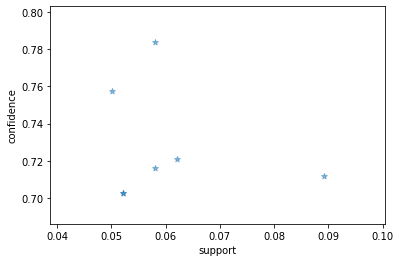

In [49]:
support = rules["support"]
confidence = rules["confidence"]
plt.scatter(support, confidence, alpha=0.5, marker="*")
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

### Using directed graph to look at associations between the rules. 

- Yellow dots represent the rules
- Green dots shows antecedents and consequents
- Incoming arrows into a rule shows the antecendents
- Outgoing arrows from a rule shows the consequents

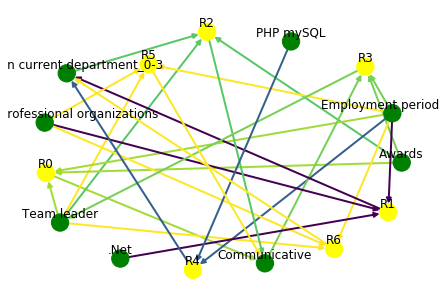

In [50]:
rules_to_show = 7

G1 = nx.DiGraph()

color_map=[]
N = 50
colors = np.random.rand(N)    
strs=['R0', 'R1', 'R2', 'R3', 'R4', 'R5', 'R6']   


for i in range (rules_to_show):      
    G1.add_nodes_from(["R"+str(i)])

    for a in rules.iloc[i]['antecedents']:
        G1.add_nodes_from([a])
        G1.add_edge(a, "R"+str(i), color=colors[i] , weight = 2)

    for c in rules.iloc[i]['consequents']:
        G1.add_nodes_from([c])
        G1.add_edge("R"+str(i), c, color=colors[i],  weight=2)

for node in G1:
   found_a_string = False
   for item in strs: 
       if node==item:
            found_a_string = True
   if found_a_string:
        color_map.append('yellow')
   else:
        color_map.append('green')       


edges = G1.edges()
colors = [G1[u][v]['color'] for u,v in edges]
weights = [G1[u][v]['weight'] for u,v in edges]

pos = nx.spring_layout(G1, k=30, scale=1)
nx.draw(G1, pos, edges=edges, node_color = color_map, edge_color=colors, width=weights, font_size=16, with_labels=False)            

for p in pos:  # raise text positions
    pos[p][1] += 0.07
nx.draw_networkx_labels(G1, pos)
plt.show()